# **Assignment**

Build a Simple Interest Calculator to Calculate Final amount using LangGraph

In [ ]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

# Step 1: Define the state
class SIState(TypedDict):
    principal: float
    rate: float
    time: float
    interest: float
    total_amount: float

# Step 2: Function to calculate simple interest
def calculate_simple_interest(state: SIState) -> SIState:
    P = state['principal']
    R = state['rate']
    T = state['time']

    interest = (P * R * T) / 100
    state['interest'] = round(interest, 2)
    return state

# Step 3: Function to calculate total amount (principal + interest)
def calculate_total_amount(state: SIState) -> SIState:
    state['total_amount'] = round(state['principal'] + state['interest'], 2)
    return state

# Step 4: Build the graph
graph = StateGraph(SIState)

graph.add_node('calculate_simple_interest', calculate_simple_interest)
graph.add_node('calculate_total_amount', calculate_total_amount)

graph.add_edge(START, 'calculate_simple_interest')
graph.add_edge('calculate_simple_interest', 'calculate_total_amount')
graph.add_edge('calculate_total_amount', END)

# Step 5: Compile the workflow
workflow = graph.compile()

In [ ]:
# Step 6: Invoke with sample data
initial_state = {
    'principal': 10000,
    'rate': 5,
    'time': 2
}

In [ ]:
final_state = workflow.invoke(initial_state)
print(final_state)

{'principal': 10000, 'rate': 5, 'time': 2, 'interest': 1000.0, 'total_amount': 11000.0}


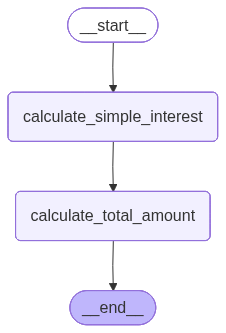

In [ ]:
# Step 7: Visualize the graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())